# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)

/Users/sheridanwall/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values=["Unknown", "UNKNOWN"])
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(30000, 15)

In [4]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog that has a license associated with it. Animal Name is the dog's name, and Primary Breed is the dog's main, most dominant breed.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

What is the most common type(breed) of dog in this dataset?
How many dogs in the dataset have been spayed or neutered?
How many licenses will expire before the end of 2016?
How many dogs have been trained?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
# df.head()
df.Primary_Breed.value_counts().sort_values(ascending=False).head(10)
#df.Primary_Breed.value_counts().head(10).plot(figsize=(10, 10), kind='barh')

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary_Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

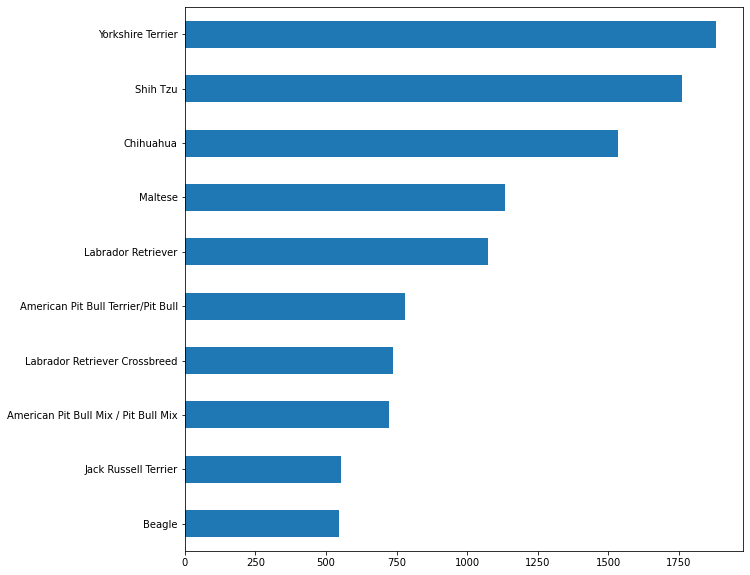

In [6]:
df.Primary_Breed.value_counts().head(10).sort_values(ascending=True).plot(figsize=(10, 10), kind='barh')

## What are the most popular dog names?

In [7]:
df.Animal_Name.value_counts().head().to_frame().reset_index()

,index,Animal_Name
0,Max,202
1,Bella,193
2,Charlie,172
3,Lola,146
4,Rocky,140


## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [8]:
df[df.Animal_Name == 'Sheridan']
# No dogs with my name

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date


In [9]:
len(df[df.Animal_Name == 'Max'])


202

In [10]:
len(df[df.Animal_Name == 'Maxwell'])

11

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [11]:
df.Guard_or_Trained.value_counts(normalize=True)*100

No     99.914254
Yes     0.085746
Name: Guard_or_Trained, dtype: float64

## What are the actual numbers?

In [12]:
df.Guard_or_Trained.value_counts()

No     19809
Yes       17
Name: Guard_or_Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [13]:
df.Guard_or_Trained.value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard_or_Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [14]:
df.Guard_or_Trained = df.Guard_or_Trained.replace({
  np.nan:"No"
})
df.Guard_or_Trained.value_counts()

No     29983
Yes       17
Name: Guard_or_Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [15]:
guard_dogs= df[df.Guard_or_Trained == 'Yes']
guard_dogs.Primary_Breed.value_counts().head(5).reset_index()

,index,Primary_Breed
0,German Shepherd Dog,3
1,German Shepherd Crossbreed,1
2,Golden Retriever,1
3,"Poodle, Standard",1
4,"Schnauzer, Miniature",1


## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [16]:
df["Year"] = df['Animal_Birth'].apply(lambda birth: birth.year)
df.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [17]:
df['Age'] = 2020 - df['Year']
df.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6


# Joining data together

In [18]:
# pd.merge to combine dataframes
# dataframe.merge(other_dataframe)
# left_on="" (left most dataframe), right_on=""
# how = "left, right, outer or inner"
        # Outer allows you to join things without an exact match
        # Left keeps everything without a match to the left and vice versa

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [31]:
neighborhoods = pd.read_csv("zipcodes-neighborhoods.csv", nrows=30000, na_values=["Unknown", "UNKNOWN", "unknown"])
neighborhoods.head()
dogs = df.merge(neighborhoods,
                how='left',
                left_on="Owner_Zip_Code",
                right_on="zip")
dogs

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,10013.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,10,West Queens,11372.0,Queens
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,10,Southwest Queens,11417.0,Queens
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,6,Southwest Brooklyn,11228.0,Brooklyn
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,11,Northwest Brooklyn,11217.0,Brooklyn


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [32]:
bronx_dogs = dogs[dogs.borough == 'Bronx']
bronx_dogs.Animal_Name.value_counts().head()

Bella       22
Max         21
Rocky       20
Princess    15
Lucky       15
Name: Animal_Name, dtype: int64

In [34]:
brooklyn_dogs = dogs[dogs.borough == "Brooklyn"]
brooklyn_dogs.Animal_Name.value_counts().head()

Max        46
Bella      45
unknown    45
Charlie    42
Rocky      36
Name: Animal_Name, dtype: int64

In [22]:
UWS_dogs = dogs[dogs.neighborhood == 'Upper West Side']
UWS_dogs.Animal_Name.value_counts().head()

Lola       17
Lucy       16
Charlie    12
Lily       11
Cooper     11
Name: Animal_Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [47]:
dogs.groupby(by='neighborhood').Primary_Breed.value_counts().sort_values(ascending=False)
# OR dogs.groupby(by='neighborhood').Primary_Breed.value_counts().groupby(level=0).nlargest(5)
# But the above prints the neighborhoods twice

neighborhood       Primary_Breed      
Upper West Side    Labrador Retriever     121
West Queens        Shih Tzu                95
Upper East Side    Havanese                94
South Shore        Shih Tzu                90
Southern Brooklyn  Yorkshire Terrier       85
                                         ... 
Lower Manhattan    Schnauzer, Standard      1
                   Scottish Terrier         1
                   Shih Tzu Crossbreed      1
                   Standard Schnauzer       1
                   Tibetan Spaniel          1
Name: Primary_Breed, Length: 3987, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [24]:
non_spayed_dogs = dogs[dogs.Spayed_or_Neut == 'No']
non_spayed_dogs.Primary_Breed.value_counts().head(10) # --> Yorkshire Terriers are least likely to be spayed
non_spayed_dogs.Animal_Gender.value_counts() # --> male dogs are least likely to be neutered
# How do I find which gender of the above selected dogs are least likely to be spayed?

M    3384
F    1953
Name: Animal_Gender, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [25]:
# dogs = dogs.Animal_Dominant_Color.replace({
#     'White' : 'WHITE',
#     'Black' : 'BLACK',
#     'Grey' : 'GREY',
#     'Gray' : 'GREY',
#     'GRAY' : 'GREY'
# })
# dogs = dogs.Animal_Secondary_Color.replace({
#     'White' : 'WHITE',
#     'Black' : 'BLACK',
#     'Grey' : 'GREY',
#     'Gray' : 'GREY',
#     'GRAY' : 'GREY'
# })
# dogs = dogs.Animal_Third_Color.replace({
#     'White' : 'WHITE',
#     'Black' : 'BLACK',
#     'Grey' : 'GREY',
#     'Gray' : 'GREY',
#     'GRAY' : 'GREY'
# })

In [26]:
# dogs['Monochrome'] = 

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

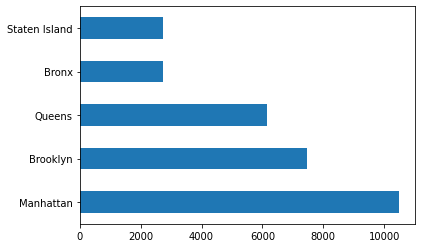

In [27]:
dogs.borough.value_counts()
dogs.borough.value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [28]:
boroughs = pd.read_csv("boro_population.csv", nrows=30000)
boroughs.head()
populations = dogs.merge(boroughs,
                         how='left',
                         left_on='borough',
                         right_on='borough')

In [70]:
#dogs per capita = # of dogs/population * 1000
# # of dogs/population * 1000 ---> There are this many dogs per thousand people
Manhattan = populations[populations.borough == "Manhattan"]
print(round((len(Manhattan)/Manhattan.population.max())*1000))

Brooklyn = populations[populations.borough == "Brooklyn"]
print(round((len(Brooklyn)/Brooklyn.population.max())*1000))

Bronx = populations[populations.borough == "Bronx"]
print(round((len(Bronx)/Bronx.population.max())*1000))

Queens = populations[populations.borough == "Queens"]
print(round((len(Queens)/Queens.population.max())*1000))

Staten_Island = populations[populations.borough == "Staten Island"]
print(round((len(Staten_Island)/Staten_Island.population.max())*1000))

#Manhattan & Staten_Island have most dogs per capita

6
3
2
3
6


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot:ylabel='borough,borough,Primary_Breed'>

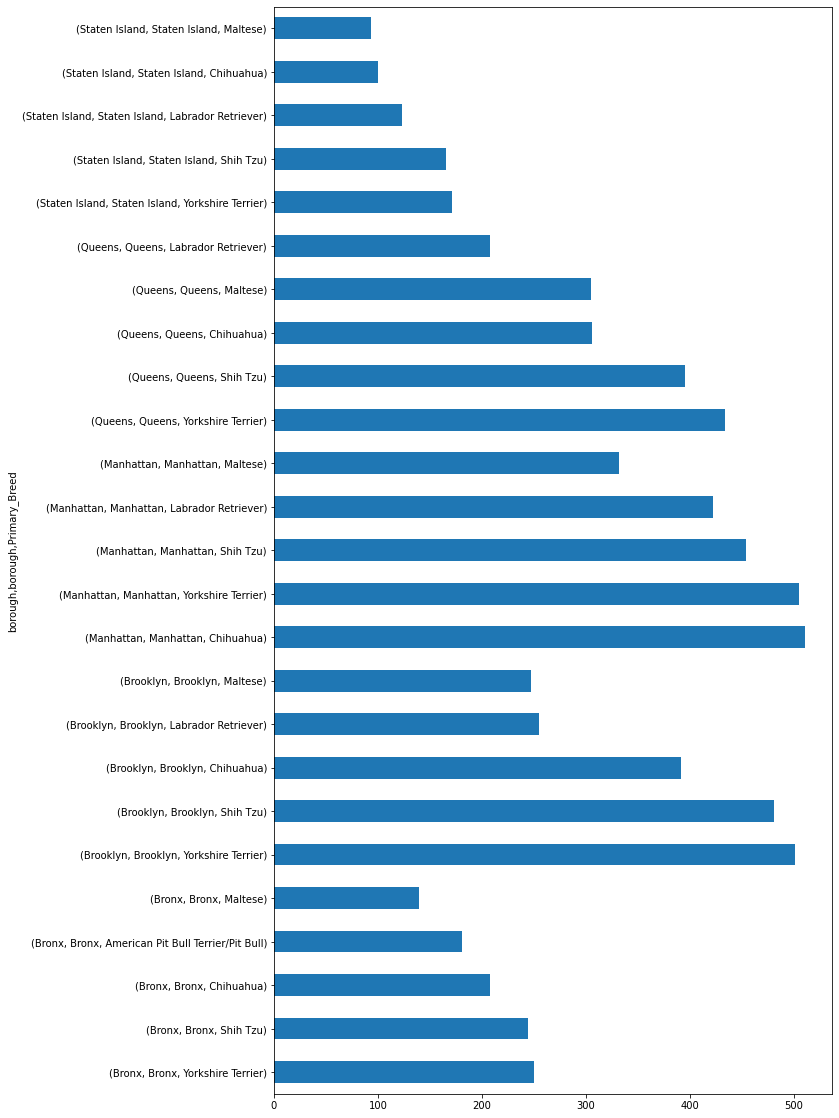

In [66]:
top_breeds = populations.groupby('borough').Primary_Breed.value_counts().groupby(level=0).nlargest(5).plot(figsize=(10,20), kind='barh')
top_breeds

## What percentage of dogs are not guard dogs?

In [68]:
not_guard = populations[populations.Guard_or_Trained == 'No']
len(not_guard)/len(populations)*100

99.94333333333333